## Product Recommendation system based on Product Description

In [4]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [5]:
product_desc = pd.read_csv('product_descriptions.csv')
product_desc.shape

(124428, 2)

In [6]:
product_desc.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [7]:
# Remove the missing values
product_desc = product_desc.dropna()
product_desc.shape

(124428, 2)

### Let's take a sample of 2000 product descriptions

In [27]:
desc = product_desc.head(2000)
desc['product_description'].head(15)

0     Not only do angles make joints stronger, they ...
1     BEHR Premium Textured DECKOVER is an innovativ...
2     Classic architecture meets contemporary design...
3     The Grape Solar 265-Watt Polycrystalline PV So...
4     Update your bathroom with the Delta Vero Singl...
5     Achieving delicious results is almost effortle...
6     The Quantum Adjustable 2-Light LED Black Emerg...
7     The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8     Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9     Valley View Industries Metal Stakes (4-Pack) a...
10    Recycler 22 in. Personal Pace Variable Speed S...
11    The 96 in. wide Caramel Simple Weave Rollup Ba...
12    The InSinkErator SinkTop Switch Single Outlet ...
13    The Rubbermaid 1-Step Folding Plastic Step Sto...
14    Backyard X-Scapes, Inc. uses the finest bamboo...
Name: product_description, dtype: object

## Feature extraction using TFIDF Vectorizer
Converting words in to numerical data

In [10]:
Tfidf = TfidfVectorizer(stop_words = 'english')
x = Tfidf.fit_transform(desc['product_description'])
x

<2000x20681 sparse matrix of type '<class 'numpy.float64'>'
	with 141753 stored elements in Compressed Sparse Row format>

### Now there are 2000 records with 141753 columns, each column representing a token word

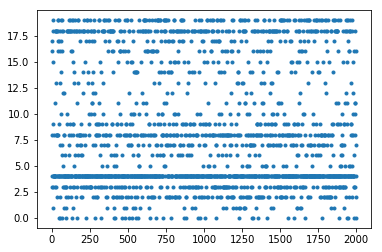

In [15]:
# Fitting K-Means to the dataset

kmeans = KMeans(n_clusters = 20, init = 'k-means++')
y_kmeans = kmeans.fit_predict(x)
plt.plot(y_kmeans, ".")
plt.show()

In [17]:
# # Optimal clusters is 

true_k = 20

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(x)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = Tfidf.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 faucet
 pull
 bathroom
 design
 finish
 tub
 vanity
 nickel
 water
 towel
Cluster 1:
 lumber
 play
 grading
 treated
 highest
 standards
 strength
 paracord
 outdoor
 meets
Cluster 2:
 cooking
 cu
 cycle
 wash
 oven
 clothes
 dryer
 washer
 cycles
 options
Cluster 3:
 light
 watt
 bulb
 fixture
 led
 fan
 bulbs
 lighting
 ceiling
 white
Cluster 4:
 toilet
 flush
 bowl
 gpf
 corner
 water
 seat
 flushing
 design
 tank
Cluster 5:
 water
 heater
 hot
 tank
 nox
 gas
 gal
 rheem
 valve
 households
Cluster 6:
 post
 fence
 posts
 gate
 vinyl
 fencing
 bamboo
 maintenance
 ft
 wood
Cluster 7:
 cutting
 blade
 tool
 engine
 speed
 mower
 power
 amp
 nailer
 motor
Cluster 8:
 storage
 shelf
 shelves
 lbs
 wall
 easy
 adjustable
 ft
 shelving
 space
Cluster 9:
 steel
 grill
 patio
 chime
 frame
 coated
 outdoor
 rust
 metal
 durable
Cluster 10:
 moulding
 mdf
 primed
 california
 proposition
 nbsp
 residents
 65
 painted
 chair
Cluster 11:
 water
 use
 ft
 con

## Now Let's see how the model classify the user input keyword

In [19]:
print("Cluster ID:")
Y = Tfidf.transform(["LED"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[3]


In [21]:
print("Cluster ID:")
Y = Tfidf.transform(["Zinc"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[11]


In [23]:
print("Cluster ID:")
Y = Tfidf.transform(["bathroom"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[0]


In [24]:
print("Cluster ID:")
Y = Tfidf.transform(["steel"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[9]


In [30]:
print("Cluster ID:")
Y = Tfidf.transform(["water"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[5]
